In [160]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## 강서구 행정동별 인구

In [161]:
population = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 주민등록인구(월별_동별) 통계.txt", delimiter = '\t')
population.head()

,기간,자치구,동,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,외국인,외국인.1,외국인.2
0,기간,자치구,동,세대,합계,남자,여자,소계,남자,여자,소계,남자,여자
1,2021.02,합계,합계,"4,427,814","9,881,998","4,799,707","5,082,291","9,648,606","4,690,282","4,958,324","233,392","109,425","123,967"
2,2021.02,종로구,소계,"75,112","158,332","76,550","81,782","148,884","72,372","76,512","9,448","4,178","5,270"
3,2021.02,종로구,사직동,"4,783","9,820","4,438","5,382","9,542","4,274","5,268",278,164,114
4,2021.02,종로구,삼청동,"1,329","2,886","1,384","1,502","2,609","1,247","1,362",277,137,140


In [162]:
population = population[population["자치구"] == "강서구"]
population.drop(["기간", "자치구", "세대"], axis = 1, inplace = True)
population = population.iloc[:, :2]
population.reset_index(inplace = True)
population.drop("index", axis = 1, inplace = True)
population.drop(0, axis = 0, inplace = True)
population.head()

,동,합계
1,염창동,"42,091"
2,등촌1동,"24,419"
3,등촌2동,"20,977"
4,등촌3동,"31,489"
5,화곡본동,"34,943"


##  강서구 법정동별 30년 이상된 집 수

In [163]:
house = pd.read_excel("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/건물현황/BLCM_STTST_20210429.xlsx",
                     sheet_name = '통계', header = 1)
house = house[house["구분.1"] == "강서구"]
house = house[["구분.1", "구분.2", "합계"]]
house.reset_index(inplace = True)
house.drop("index", axis = 1, inplace = True)
house.rename(columns ={"구분.1" : "자치구", "구분.2" : "동"}, inplace = True)
house.head()

,자치구,동,합계
0,강서구,가양동,120
1,강서구,개화동,350
2,강서구,공항동,955
3,강서구,과해동,8
4,강서구,내발산동,369


## 강서구 행정동별 65세 이상 인구수

In [164]:
oldpeople = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 고령자현황 (동별) 통계.txt", delimiter = '\t')
oldpeople = oldpeople[oldpeople["자치구"] == "강서구"]
oldpeople = oldpeople.iloc[:, 1:7]
oldpeople.drop(["전체인구", "전체인구.1", "전체인구.2"], axis = 1, inplace = True)
oldpeople.drop(258, axis = 0, inplace = True)
oldpeople.reset_index(inplace = True)
oldpeople.drop(["index", "자치구"], axis = 1, inplace = True)
oldpeople

,동,65세이상 인구
0,염창동,"4,241"
1,등촌1동,"2,809"
2,등촌2동,"3,096"
3,등촌3동,"6,498"
4,화곡본동,"4,764"
5,화곡2동,"2,846"
6,화곡3동,"3,962"
7,화곡4동,"3,730"
8,화곡6동,"3,831"
9,화곡8동,"4,332"


## 강서구 행정동별 기초생활수급자수 

In [165]:
poor = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 국민기초생활보장 수급자 (동별) 통계.txt", delimiter = '\t')
poor = poor[poor["자치구"] == "강서구"]
poor = poor.iloc[:, 1:4]
poor.drop(273, axis = 0, inplace = True)
poor.reset_index(inplace = True)
poor.drop(["index", "자치구"], axis = 1, inplace = True)
poor.head() 

,동,총 수급자
0,염창동,145
1,등촌1동,195
2,등촌2동,278
3,등촌3동,"4,074"
4,화곡본동,"1,107"


## 강서구 행정동별 장애인수

In [166]:
disabled = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 장애인 현황 (장애유형별동별) 통계.txt", delimiter = '\t')
disabled = disabled[disabled["자치구"] == "강서구"]
disabled = disabled.iloc[:, 1:4]
disabled.drop(259, axis = 0, inplace = True)
disabled.reset_index(inplace = True)
disabled.drop(["index", "자치구"], axis = 1, inplace = True)
disabled.head() 

,동,합계
0,염창동,"1,114"
1,등촌1동,736
2,등촌2동,732
3,등촌3동,"3,861"
4,화곡본동,"1,420"


## 강서구 행정동별 화재수

In [167]:
fire = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 화재발생 현황 (동별) 통계.txt", delimiter = '\t')
fire = fire[fire["자치구"] == "강서구"]
fire = fire.iloc[:, 1:4]
fire.drop(256, axis = 0, inplace = True)
fire.reset_index(inplace = True)
fire.drop(["index", "자치구"], axis = 1, inplace = True)
fire.head() 

,동,발생
0,염창동,16
1,등촌1동,18
2,등촌2동,8
3,등촌3동,15
4,화곡본동,31


# 행정동별 가스사용량

In [168]:
gas = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/행정동별/서울시 도시가스 이용현황 (용도별동별) 통계.txt", delimiter = '\t')
gas = gas[gas["자치구"] == "강서구"]
gas.drop(["기간", "자치구", "가정용.1", "가정용.2"], axis = 1, inplace = True)
gas.drop(257, axis = 0, inplace = True)
gas.reset_index(inplace = True)
gas.drop("index", axis = 1, inplace = True)
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동       20 non-null     object
 1   합계      20 non-null     object
 2   가정용     20 non-null     object
 3   일반용     20 non-null     object
 4   업무용     20 non-null     object
 5   산업용     20 non-null     object
 6   열병합     20 non-null     object
 7   수송용     20 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


In [169]:
object_index1 = gas.columns[1:5]
object_index2 = gas.columns[5:]
for objects in object_index1:
    gas[objects] = gas[objects].map(lambda x : x.replace(",", ""))
for objects in object_index2:
    gas[objects] = gas[objects].map(lambda x : x.replace('-', "0"))

for objects in gas.columns[1:]:
    # 숫자로 바꾼다
    gas[objects] = gas[objects].map(lambda x : float(x))
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   동       20 non-null     object 
 1   합계      20 non-null     float64
 2   가정용     20 non-null     float64
 3   일반용     20 non-null     float64
 4   업무용     20 non-null     float64
 5   산업용     20 non-null     float64
 6   열병합     20 non-null     float64
 7   수송용     20 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.4+ KB


In [170]:
gas.rename(columns = {"합계" : "가스사용총량"}, inplace = True)
gas

,동,가스사용총량,가정용,일반용,업무용,산업용,열병합,수송용
0,염창동,16157.0,14844.0,982.0,328.0,0.0,3.0,0.0
1,등촌1동,11694.0,10419.0,547.0,727.0,0.0,1.0,0.0
2,등촌2동,9114.0,8802.0,167.0,145.0,0.0,0.0,0.0
3,등촌3동,15378.0,14186.0,769.0,422.0,0.0,1.0,0.0
4,화곡본동,17162.0,16497.0,365.0,300.0,0.0,0.0,0.0
5,화곡2동,8892.0,8529.0,154.0,209.0,0.0,0.0,0.0
6,화곡3동,9557.0,8991.0,340.0,226.0,0.0,0.0,0.0
7,화곡4동,10718.0,10107.0,414.0,197.0,0.0,0.0,0.0
8,화곡6동,11977.0,10934.0,663.0,378.0,0.0,2.0,0.0
9,화곡8동,12032.0,11602.0,294.0,136.0,0.0,0.0,0.0


## 행정동별 사업체

In [171]:
store = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/행정동별/서울시 사업체분포 (다수업종동별) 통계.txt", delimiter = '\t')
store = store[store["자치구"] == "강서구"]
take_col_index = list(range(2,23,2))
store = store.iloc[:, take_col_index] # 종사자수만 가져오기
store.drop(257, axis = 0, inplace = True)
store.reset_index(inplace = True, drop = True)
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   동                  20 non-null     object
 1   택시운송업.1            20 non-null     object
 2   한식 일반 음식점업.1       20 non-null     object
 3   용달 화물자동차 운송업.1     20 non-null     object
 4   부동산 중개 및 대리업.1     20 non-null     object
 5   두발미용업.1            20 non-null     object
 6   커피전문점.1            20 non-null     object
 7   남녀용 겉옷 및 셔츠 도매업.1  20 non-null     object
 8   기타주점업.1            20 non-null     object
 9   일반 교과 학원.1         20 non-null     object
 10  한식 육류요리 전문점.1      20 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


In [172]:
object_index1 = store.columns[1:]
for objects in object_index1:
    store[objects] = store[objects].map(lambda x : x.replace(",", ""))
for objects in object_index1:
    store[objects] = store[objects].map(lambda x : x.replace('-', "0"))

for objects in store.columns[1:]:
    # 숫자로 바꾼다
    store[objects] = store[objects].map(lambda x : float(x))
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   동                  20 non-null     object 
 1   택시운송업.1            20 non-null     float64
 2   한식 일반 음식점업.1       20 non-null     float64
 3   용달 화물자동차 운송업.1     20 non-null     float64
 4   부동산 중개 및 대리업.1     20 non-null     float64
 5   두발미용업.1            20 non-null     float64
 6   커피전문점.1            20 non-null     float64
 7   남녀용 겉옷 및 셔츠 도매업.1  20 non-null     float64
 8   기타주점업.1            20 non-null     float64
 9   일반 교과 학원.1         20 non-null     float64
 10  한식 육류요리 전문점.1      20 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


In [173]:
store

,동,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,염창동,536.0,241.0,101.0,125.0,69.0,125.0,126.0,56.0,239.0,47.0
1,등촌1동,220.0,274.0,71.0,98.0,82.0,175.0,20.0,46.0,115.0,115.0
2,등촌2동,218.0,50.0,61.0,54.0,31.0,53.0,0.0,27.0,42.0,32.0
3,등촌3동,348.0,354.0,78.0,89.0,80.0,187.0,297.0,75.0,265.0,165.0
4,화곡본동,136.0,136.0,119.0,101.0,70.0,70.0,3.0,74.0,119.0,99.0
5,화곡2동,71.0,42.0,82.0,41.0,37.0,16.0,0.0,16.0,65.0,11.0
6,화곡3동,71.0,150.0,60.0,79.0,102.0,63.0,4.0,92.0,169.0,120.0
7,화곡4동,93.0,135.0,94.0,54.0,88.0,62.0,0.0,53.0,45.0,91.0
8,화곡6동,678.0,312.0,101.0,86.0,66.0,74.0,2.0,326.0,44.0,148.0
9,화곡8동,99.0,160.0,87.0,103.0,85.0,65.0,1.0,44.0,66.0,72.0


## 행정동별 시장

In [174]:
market= pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/행정동별/서울시 시장현황 (동별) 통계.txt", delimiter = '\t')
market = market[market["자치구"] == "강서구"]
take_col_index = [2,4,7,10,13]
market = market.iloc[:, take_col_index] # 점포수만 가져오기
market.drop(134, axis = 0, inplace = True)
market.reset_index(inplace = True, drop = True)
market.head()

,동,합계.1,등록시장.1,인정시장.1,상점가.1
0,등촌1동,10,10,-,-
1,화곡본동,50,-,50,-
2,화곡3동,30,30,-,-
3,화곡4동,190,15,175,-
4,화곡8동,145,-,145,-


In [175]:
object_index1 = market.columns[1:]

for objects in object_index1:
    market[objects] = market[objects].map(lambda x : x.replace('-', "0"))

for objects in object_index1:
    # 숫자로 바꾼다
    market[objects] = market[objects].map(lambda x : float(x))
market

,동,합계.1,등록시장.1,인정시장.1,상점가.1
0,등촌1동,10.0,10.0,0.0,0.0
1,화곡본동,50.0,0.0,50.0,0.0
2,화곡3동,30.0,30.0,0.0,0.0
3,화곡4동,190.0,15.0,175.0,0.0
4,화곡8동,145.0,0.0,145.0,0.0
5,발산1동,103.0,0.0,0.0,103.0
6,방화1동,123.0,0.0,123.0,0.0
7,방화2동,4.0,4.0,0.0,0.0
8,화곡1동,90.0,21.0,69.0,0.0


## 행정동별 주택종류

In [176]:
villa= pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/행정동별/서울시 주택종류별 주택 (동별) 통계.txt", delimiter = '\t')
villa = villa[villa["자치구"] == "강서구"]
villa.drop(256, axis = 0, inplace = True)
villa.drop(["기간","자치구", "합계"], axis = 1, inplace = True)
villa.reset_index(inplace = True, drop = True)
villa

,동,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,염창동,165,26,95,44,"11,120",252,823,56
1,등촌1동,218,17,129,72,"4,045",327,996,43
2,등촌2동,535,74,401,60,"2,614",483,"2,498",40
3,등촌3동,9,X,5,X,"13,287",X,166,13
4,화곡본동,863,168,517,178,786,632,"8,910",82
5,화곡2동,740,67,557,116,338,96,"4,255",64
6,화곡3동,542,34,426,82,"3,337",120,"2,067",40
7,화곡4동,938,79,681,178,694,197,"4,213",89
8,화곡6동,589,51,415,123,"3,051",692,"3,206",83
9,화곡8동,769,98,526,145,683,339,"6,400",56


In [177]:
object_index1 = villa.columns[1:]

for objects in object_index1:
    villa[objects] = villa[objects].map(lambda x : x.replace('X', "0"))
for objects in object_index1:
    villa[objects] = villa[objects].map(lambda x : x.replace(',', ""))
    
for objects in object_index1:
    # 숫자로 바꾼다
    villa[objects] = villa[objects].map(lambda x : float(x))
villa

,동,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,염창동,165.0,26.0,95.0,44.0,11120.0,252.0,823.0,56.0
1,등촌1동,218.0,17.0,129.0,72.0,4045.0,327.0,996.0,43.0
2,등촌2동,535.0,74.0,401.0,60.0,2614.0,483.0,2498.0,40.0
3,등촌3동,9.0,0.0,5.0,0.0,13287.0,0.0,166.0,13.0
4,화곡본동,863.0,168.0,517.0,178.0,786.0,632.0,8910.0,82.0
5,화곡2동,740.0,67.0,557.0,116.0,338.0,96.0,4255.0,64.0
6,화곡3동,542.0,34.0,426.0,82.0,3337.0,120.0,2067.0,40.0
7,화곡4동,938.0,79.0,681.0,178.0,694.0,197.0,4213.0,89.0
8,화곡6동,589.0,51.0,415.0,123.0,3051.0,692.0,3206.0,83.0
9,화곡8동,769.0,98.0,526.0,145.0,683.0,339.0,6400.0,56.0


## TOTAL DATA 1 만들기

In [178]:
# gas, store, market, villa
total_data1 = pd.merge(gas, store, on = "동")
total_data2 = pd.merge(total_data1, market, on = "동", how = 'left')
total_data = pd.merge(total_data2, villa, on = "동")
total_data.rename(columns = {"동" : "area"}, inplace = True)
total_data.fillna(0, inplace = True)
total_data

,area,가스사용총량,가정용,일반용,업무용,산업용,열병합,수송용,택시운송업.1,한식 일반 음식점업.1,...,인정시장.1,상점가.1,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,염창동,16157.0,14844.0,982.0,328.0,0.0,3.0,0.0,536.0,241.0,...,0.0,0.0,165.0,26.0,95.0,44.0,11120.0,252.0,823.0,56.0
1,등촌1동,11694.0,10419.0,547.0,727.0,0.0,1.0,0.0,220.0,274.0,...,0.0,0.0,218.0,17.0,129.0,72.0,4045.0,327.0,996.0,43.0
2,등촌2동,9114.0,8802.0,167.0,145.0,0.0,0.0,0.0,218.0,50.0,...,0.0,0.0,535.0,74.0,401.0,60.0,2614.0,483.0,2498.0,40.0
3,등촌3동,15378.0,14186.0,769.0,422.0,0.0,1.0,0.0,348.0,354.0,...,0.0,0.0,9.0,0.0,5.0,0.0,13287.0,0.0,166.0,13.0
4,화곡본동,17162.0,16497.0,365.0,300.0,0.0,0.0,0.0,136.0,136.0,...,50.0,0.0,863.0,168.0,517.0,178.0,786.0,632.0,8910.0,82.0
5,화곡2동,8892.0,8529.0,154.0,209.0,0.0,0.0,0.0,71.0,42.0,...,0.0,0.0,740.0,67.0,557.0,116.0,338.0,96.0,4255.0,64.0
6,화곡3동,9557.0,8991.0,340.0,226.0,0.0,0.0,0.0,71.0,150.0,...,0.0,0.0,542.0,34.0,426.0,82.0,3337.0,120.0,2067.0,40.0
7,화곡4동,10718.0,10107.0,414.0,197.0,0.0,0.0,0.0,93.0,135.0,...,175.0,0.0,938.0,79.0,681.0,178.0,694.0,197.0,4213.0,89.0
8,화곡6동,11977.0,10934.0,663.0,378.0,0.0,2.0,0.0,678.0,312.0,...,0.0,0.0,589.0,51.0,415.0,123.0,3051.0,692.0,3206.0,83.0
9,화곡8동,12032.0,11602.0,294.0,136.0,0.0,0.0,0.0,99.0,160.0,...,145.0,0.0,769.0,98.0,526.0,145.0,683.0,339.0,6400.0,56.0


## TOTAL DATA만들기

In [179]:
total_data1 = pd.merge(poor, oldpeople, on = "동")
total_data2 = pd.merge(total_data1, disabled, on = "동")
total_data3 = pd.merge(total_data2, fire, on = "동")
total_data3.rename(columns = {"동" : "area", "총수급자" : "기초생활수급자", "합계": "총 장애인수", "발생": "화재발생"}, inplace = True)

object_index = total_data3.columns[1:]
for objects in object_index:
    total_data3[objects] = total_data3[objects].map(lambda x : x.replace(",", ""))

    # 숫자로 바꾼다
    total_data3[objects] = total_data3[objects].map(lambda x : float(x))

total_data = pd.merge(total_data3, total_data, on = "area")

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               20 non-null     object 
 1   총 수급자              20 non-null     float64
 2   65세이상 인구           20 non-null     float64
 3   총 장애인수             20 non-null     float64
 4   화재발생               20 non-null     float64
 5   가스사용총량             20 non-null     float64
 6   가정용                20 non-null     float64
 7   일반용                20 non-null     float64
 8   업무용                20 non-null     float64
 9   산업용                20 non-null     float64
 10  열병합                20 non-null     float64
 11  수송용                20 non-null     float64
 12  택시운송업.1            20 non-null     float64
 13  한식 일반 음식점업.1       20 non-null     float64
 14  용달 화물자동차 운송업.1     20 non-null     float64
 15  부동산 중개 및 대리업.1     20 non-null     float64
 16  두발미용업.1            20 non-nu

## 서울 행정동 경계 shp 파일

In [208]:
import geopandas as gpd
seoul = gpd.GeoDataFrame.from_file("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/행정동 구역/Z_SOP_BND_ADM_DONG_PG.shp", encoding='cp949')
seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."


In [211]:
list1 = []
for k in total_data["area"].values:
    list1.append(seoul[seoul["ADM_DR_NM"] == k].index.values)
list1

[array([240], dtype=int64),
 array([241], dtype=int64),
 array([242], dtype=int64),
 array([243], dtype=int64),
 array([244], dtype=int64),
 array([245], dtype=int64),
 array([246], dtype=int64),
 array([247], dtype=int64),
 array([248], dtype=int64),
 array([249], dtype=int64),
 array([ 250, 1022], dtype=int64),
 array([ 251, 1023], dtype=int64),
 array([252], dtype=int64),
 array([253], dtype=int64),
 array([254], dtype=int64),
 array([255], dtype=int64),
 array([256], dtype=int64),
 array([257], dtype=int64),
 array([258], dtype=int64),
 array([259], dtype=int64)]

In [212]:
list2 = list(range(240,260))
s_data = seoul.iloc[list2, :]
s_data

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
240,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45..."
241,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45..."
242,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45..."
243,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45..."
244,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44..."
245,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44..."
246,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44..."
247,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44..."
248,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45..."
249,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44..."


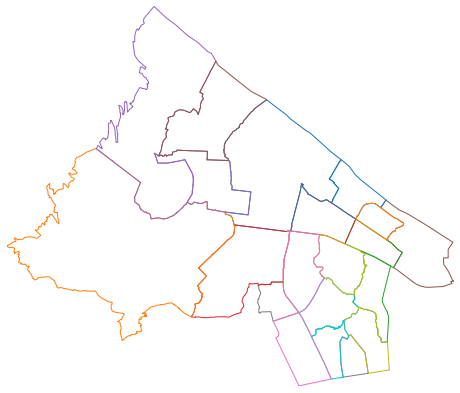

In [213]:
import matplotlib.pyplot as plt
minx, miny, maxx, maxy = s_data.total_bounds

ax = s_data.plot(column="ADM_DR_NM", figsize=(8,8), facecolor = "None", edgecolor = "white")
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()
plt.show()

In [185]:
s_data["centroid"] = s_data["geometry"].centroid
s_data

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,centroid
240,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244)
241,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051)
242,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452)
243,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089)
244,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790)
245,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743)
246,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808)
247,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053)
248,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921)
249,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802)


In [186]:
center = s_data.iloc[:, 2:]
center.drop("geometry", axis = 1, inplace = True)
center.rename(columns = {"centroid" :  "geometry"}, inplace = True)
center.head()

,ADM_DR_NM,OBJECTID,geometry
240,염창동,241,POINT (188672.758 450565.244)
241,등촌1동,242,POINT (187595.169 450713.051)
242,등촌2동,243,POINT (187630.417 449601.452)
243,등촌3동,244,POINT (186410.833 451308.089)
244,화곡본동,245,POINT (186577.306 449246.790)


In [187]:
from pyproj import Proj, transform
import numpy as np
import pandas  as pd

In [197]:
import geopandas as gpd
seoul = gpd.GeoDataFrame.from_file('./spatial_analysis-master/spatial_analysis-master/data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')
print(seoul.crs)

for i in range(25):
    if seoul.loc[i, "SGG_NM"] == "서울시노원구":
        seoul.loc[i, "SGG_NM"] = "노원구"
    elif seoul.loc[i, "SGG_NM"] == "서울시도봉구":
        seoul.loc[i, "SGG_NM"] = "도봉구"
    elif seoul.loc[i, "SGG_NM"] == "서울시성북구":
        seoul.loc[i, "SGG_NM"] = "성북구"
seoul.head()

{'init': 'epsg:5179'}


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [199]:
s_data

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,centroid
240,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244)
241,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051)
242,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452)
243,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089)
244,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790)
245,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743)
246,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808)
247,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053)
248,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921)
249,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802)


In [260]:
s_data.rename(columns = {"ADM_DR_NM" : "area"}, inplace = True)

visual_data = pd.merge(s_data, total_data, on = "area")
visual_data

C:\Users\Leegihong\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,BASE_DATE,ADM_DR_CD,area,OBJECTID,geometry,centroid,총 수급자,65세이상 인구,총 장애인수,화재발생,...,인정시장.1,상점가.1,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244),145.0,4241.0,1114.0,16.0,...,0.0,0.0,165.0,26.0,95.0,44.0,11120.0,252.0,823.0,56.0
1,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051),195.0,2809.0,736.0,18.0,...,0.0,0.0,218.0,17.0,129.0,72.0,4045.0,327.0,996.0,43.0
2,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452),278.0,3096.0,732.0,8.0,...,0.0,0.0,535.0,74.0,401.0,60.0,2614.0,483.0,2498.0,40.0
3,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089),4074.0,6498.0,3861.0,15.0,...,0.0,0.0,9.0,0.0,5.0,0.0,13287.0,0.0,166.0,13.0
4,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790),1107.0,4764.0,1420.0,31.0,...,50.0,0.0,863.0,168.0,517.0,178.0,786.0,632.0,8910.0,82.0
5,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743),566.0,2846.0,795.0,10.0,...,0.0,0.0,740.0,67.0,557.0,116.0,338.0,96.0,4255.0,64.0
6,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808),440.0,3962.0,848.0,5.0,...,0.0,0.0,542.0,34.0,426.0,82.0,3337.0,120.0,2067.0,40.0
7,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053),700.0,3730.0,959.0,13.0,...,175.0,0.0,938.0,79.0,681.0,178.0,694.0,197.0,4213.0,89.0
8,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921),657.0,3831.0,960.0,14.0,...,0.0,0.0,589.0,51.0,415.0,123.0,3051.0,692.0,3206.0,83.0
9,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802),680.0,4332.0,1073.0,17.0,...,145.0,0.0,769.0,98.0,526.0,145.0,683.0,339.0,6400.0,56.0


## 강서구 각 행정동별 수집된 데이터들을 지도 시각화 

In [262]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

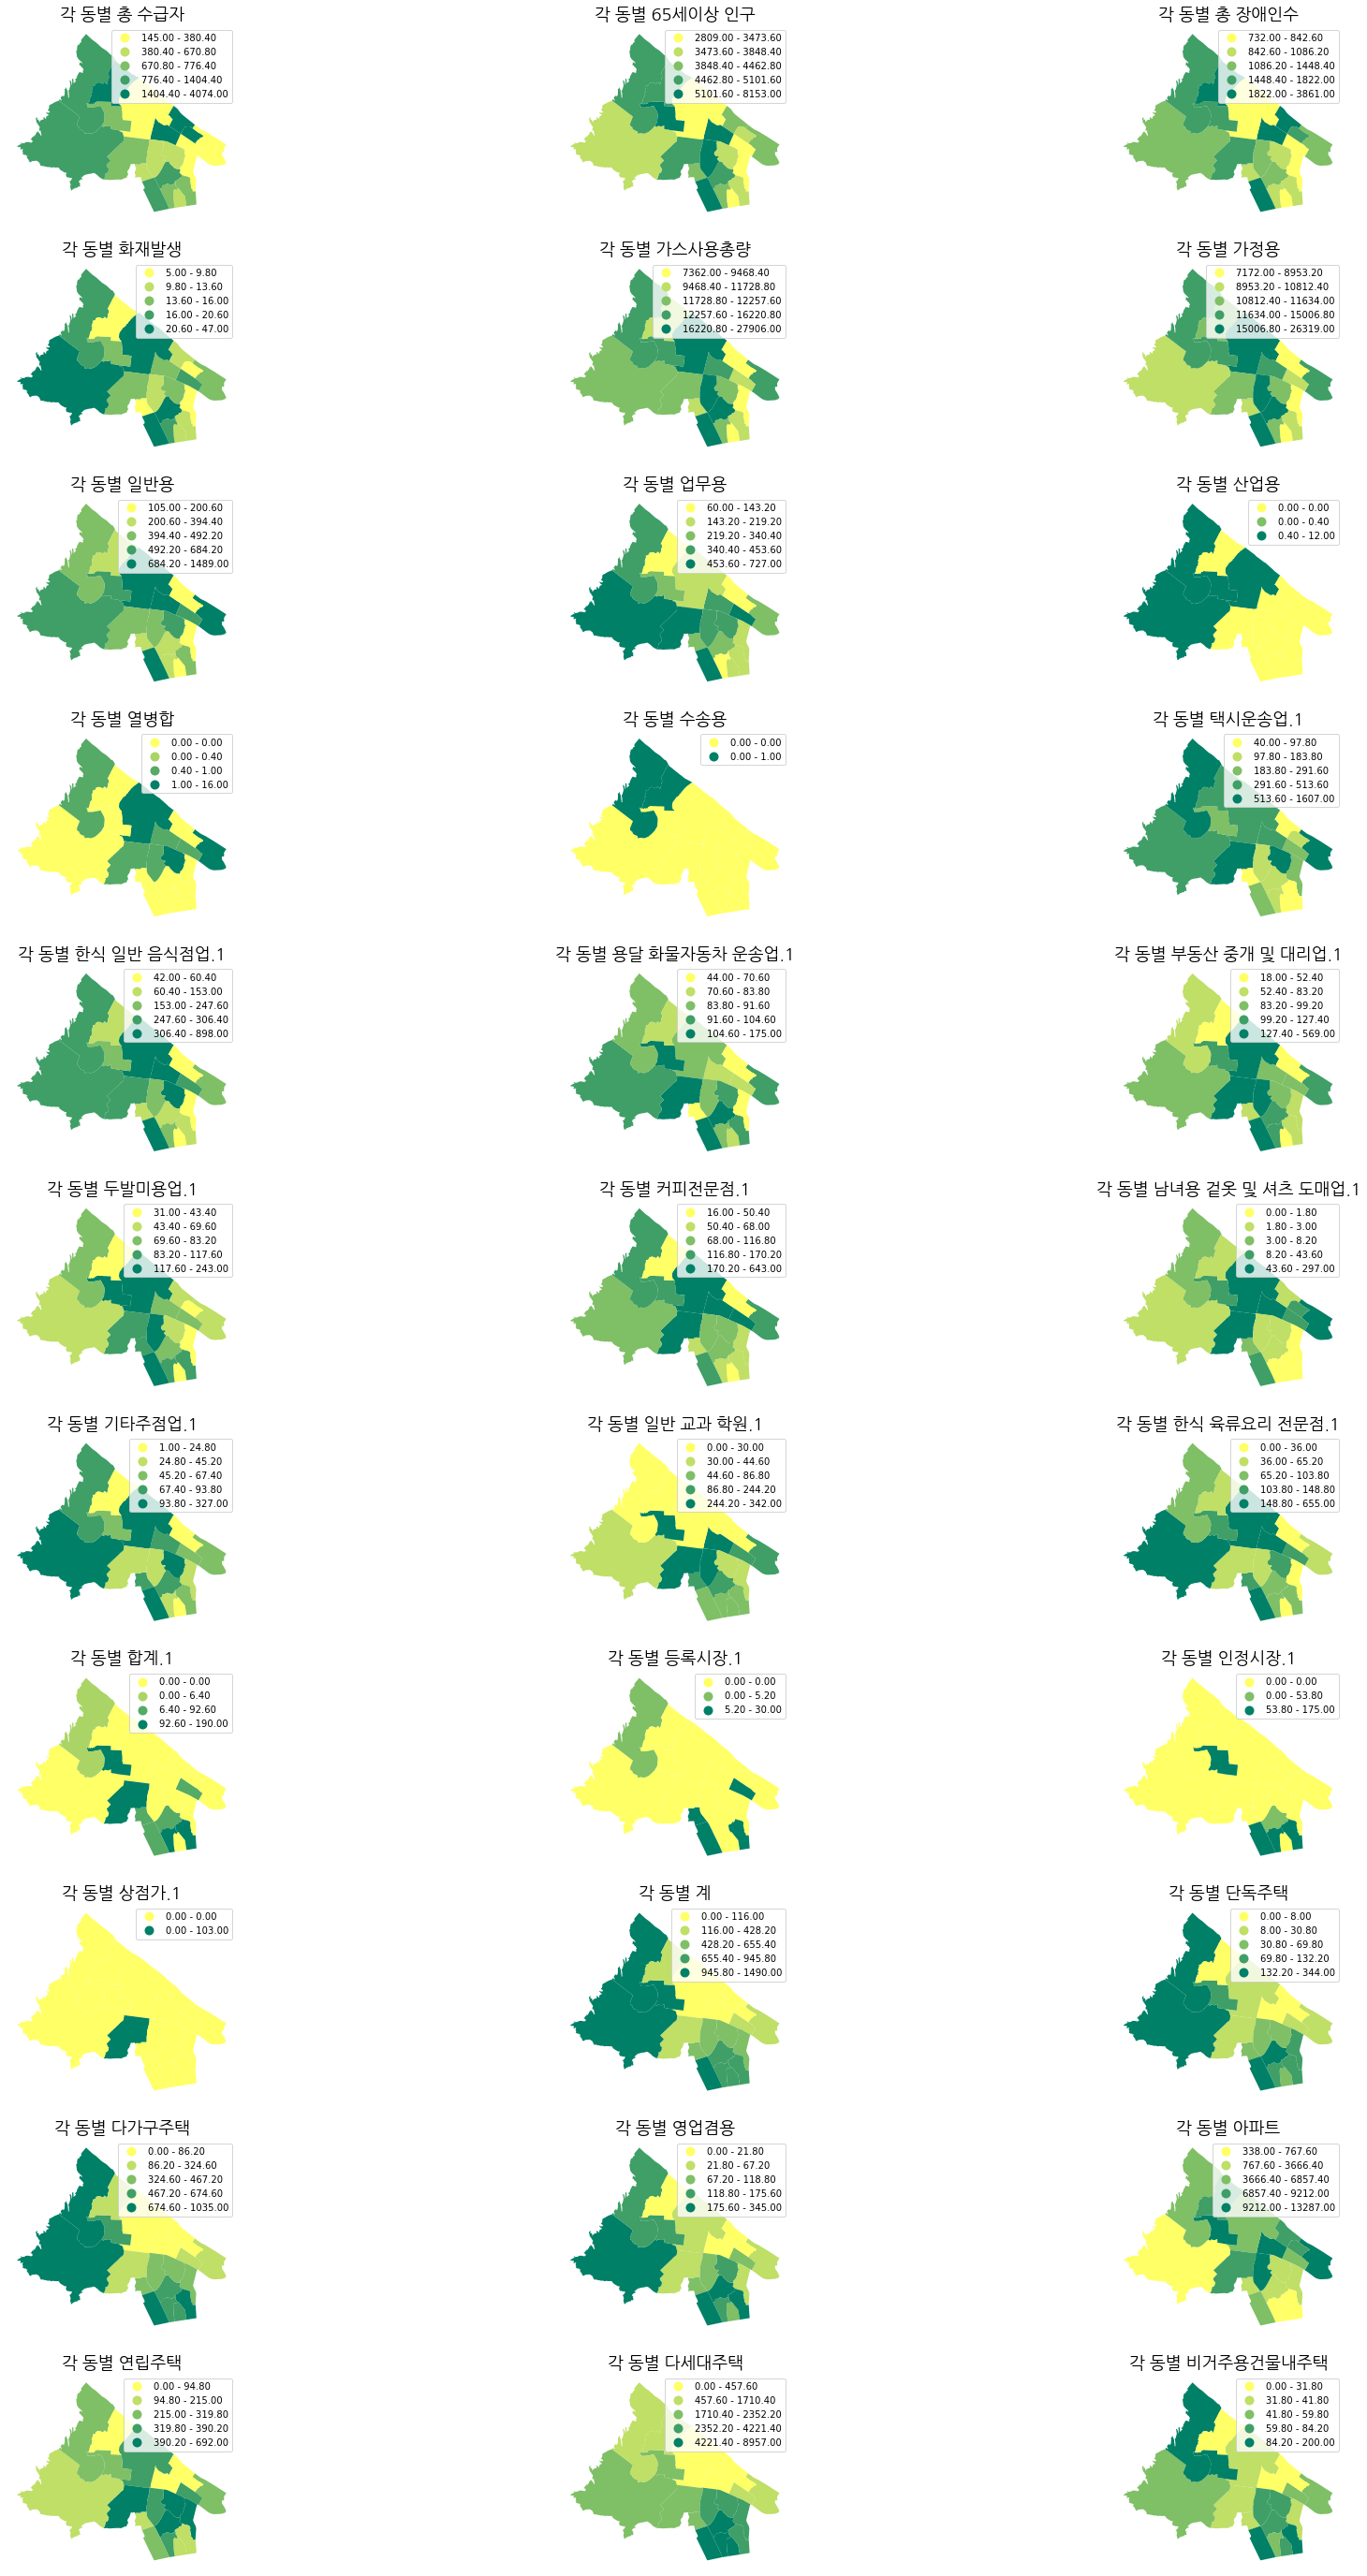

In [270]:
path = "C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
fontprop = fm.FontProperties(fname=path, size=18)

fig = plt.figure(figsize = (30, 50))

for name, i in zip(col_name, range(33)):
    ax = fig.add_subplot(11,3,i+1)
    ax = visual_data.plot(ax = ax, column= name , cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
    ax.set_title("각 동별 "+name , fontproperties=fontprop)
    ax.set_axis_off()

plt.show()